# Barycentric Formula

Write the Lagrangian form of the interpolating polynomial $P_2$ corresponding to the data in the table below:

| x_j | f(x_j) |  |
| --- | --- | --- |
| 0 | 1 |  |
| 1 | 1 |  |
| 3 | -5 |  |

We proved in class that

$$ || f - p_n ||_{\infty} \leq (1 + \Lambda_n)||f-p_n^* ||_{\infty} $$

where $p_n$ is the interpolating polynomial of $f$ at the nodes $x_0, \ldots, x_n$, $p_n^*$ is the best approximation of $f$, in the supremum (infinity) norm, by a polynomial of degree at most $n$, and $\Lambda_n$ is the Lebesgue constant, i.e. $\Lambda_n = ||L_n||_{\infty}$, where

$$ L_n(x) = \sum_{j=0}^{n} |l_j(x)| \qquad (2)$$ 

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

#### Lebesgue function associated to a given set of nodes

Write a computer code to evaluate the Lebesgue function (2) associated to a given
set of pairwise distinct nodes $x_0, \ldots, x_n$.

In [18]:
def lagrange_value ( data_num, t_data, interp_num, t_interp ): 
    l_interp = np.ones ( [ data_num, interp_num ] )
    for i in range ( 0, data_num ):
        for j in range ( 0, data_num ): 
            if ( j != i ):
                for k in range ( 0, interp_num ):
                    l_interp[i,k] = l_interp[i,k] \
                    * ( t_interp[k] - t_data[j] ) / ( t_data[i] - t_data[j] )
    return l_interp


def lebesgue_function ( n, x, nfun, xfun ): 
    if ( n == 1 ):
        lfun = np.ones ( nfun ) 
    else:
        llfun = lagrange_value ( n, x, nfun, xfun )
        lfun = np.zeros ( nfun ) 
        
    for j in range ( 0, nfun ):
        t = 0.0
        for i in range ( 0, n ):
            t = t + abs ( llfun[i,j] ) 
        lfun[j] = t
    return lfun


def lebesgue_constant ( n, x, nfun, xfun ):
    lfun = lebesgue_function ( n, x, nfun, xfun )
    lmax = np.max ( lfun )
    return lmax

#### Equidistributed Points

Consider the equidistributed points $x_j = -1+j(2/n)$ for $j = 0, \ldots, n$. Write a computer code that uses $(a)$ to evaluate and plot $L_n(x)$ (evaluate $L_n(x)$ at a large number of points $\bar{x}_k$ to have a good plotting resolution, e.g. $\bar{x}_k = -1 + k(2/n_e)$, $k = 0, \ldots, n_e$ with $n_e = 1000$) for $n = 4, 10$, and $20$. Estimate $\Lambda n$ for these three values of $n$.

n = 4 Lebesgue Constant = 1.6311
n = 10 Lebesgue Constant = 17.8481
n = 20 Lebesgue Constant = 5888.6080


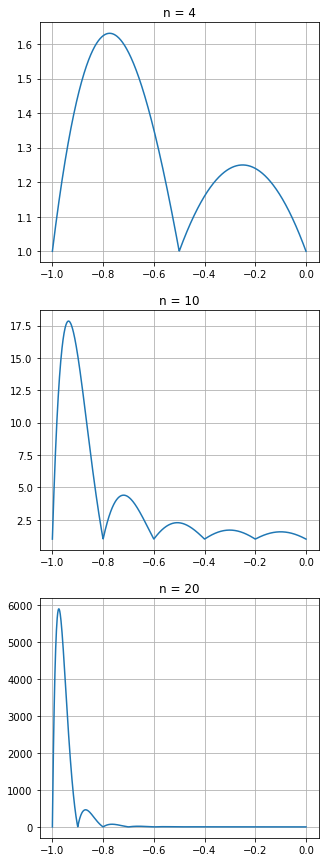

In [19]:
fig = plt.figure(figsize=(5,15))
ne=1000
k = np.arange(ne) 
i=0

for n in [4,10,20]:
    i+=1
    j = np.arange(n)
    xj = -1+j*(2/n)
    xk = np.linspace(-1,0,ne)
    l = lebesgue_constant ( n, xj, ne, xk )
    lfun = lebesgue_function(n, xj, ne, xk)
    print("n = %d Lebesgue Constant = %1.4f" %(n,l))
    
    ax = fig.add_subplot(3,1,i) 
    ax.plot(xk,lfun)
    ax.grid()
    ax.set_title("n = " + str(n))

#### Chebyshev Points

Repeat $(b)$ for the Chebyshev nodes $x_j = \text{cos}(\frac{j\pi}{n})$, $j = 0, \ldots, n$. Contrast the
behavior of $L_n(x)$ and $\Lambda_n$ with those corresponding to the equidistributed points in
$(b)$

n = 4 Lebesgue Constant = 7.0000
n = 10 Lebesgue Constant = 19.0000
n = 20 Lebesgue Constant = 39.0000


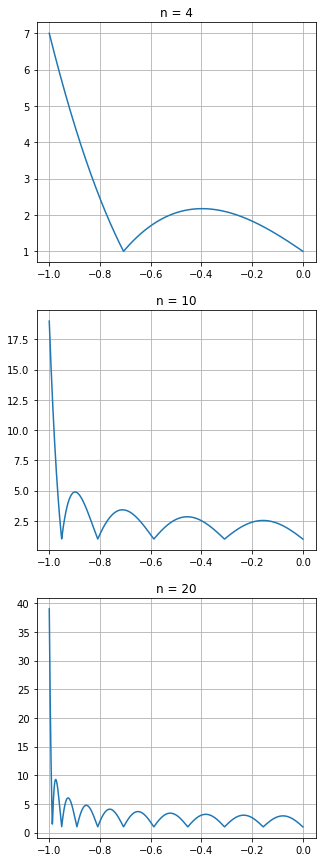

In [20]:
fig = plt.figure(figsize=(5,15))

ne=1000
k = np.arange(ne) 
i=0

for n in [4,10,20]:
    i+=1
    j = np.arange(n)
    xj = np.cos((j*np.pi)/n)
    xk = np.linspace(-1,0,ne)
    l = lebesgue_constant ( n, xj, ne, xk )
    lfun = lebesgue_function(n, xj, ne, xk)
    print("n = %d Lebesgue Constant = %1.4f" %(n,l))
    
    ax = fig.add_subplot(3,1,i) 
    ax.plot(xk, lfun)
    ax.grid()
    ax.set_title("n = " + str(n))

## Barycentric Formula

Implement the Barycentric Formula for evaluating the interpolating polynomial for arbitrarily distributed nodes $x_0, \ldots ,x_n$; you need to write a function or script that computes the barycentric weights $\lambda_j$, $j = 0, 1,\ldots ,n$, first and another code to use these values in the Barycentric Formula. Make sure to test your implementation.

In [22]:
def barycentric_interp(x,y,xx): 
    M=len(x)
    N=len(xx)
    
    # Compute the barycentric weights
    X = np.repeat(x,M)
    X = X.reshape(M,M)
    W = 1./np.prod((X - np.transpose(X)) + np.eye(M), axis=0)
    
    yy = xx
    
    for i in range(N):
        xdist = xx[i]-x
        idx = np.argwhere(xdist==0) 
        H = W/xdist
        if len(idx) > 0:
            yy[i] = y[idx] 
        else:
            yy[i] = (H.dot(y))/np.sum(H)
            
    return yy

Consider the following data in the array: 

In [25]:
xj = np.array([0, 0.25, 0.52, 0.74, 1.28, 1.50]) 
yj = np.array([0, 0.7070, 1, 0.7071, -0.7074, -1]) 

Use your code in $(a)$ to find $P_5(2)$ as an approximation of $f(2)$.

In [26]:
xx = np.array([2])
yy = barycentric_interp(xj,yj,xx)
print("f(2) = %1.2f" %(yy))

f(2) = -2.00


## Rung Example

Let 
$$ f(x) = \frac{1}{1 + 25 x^2} \qquad x \in [-1,1] $$

Using your Barycentric Formula code (Prob. 3) and (4) and (5) below, evaluate and plot the interpolating polynomial $p_n$ of $f$ corresponding to:

#### (a) The equidistributed nodes $x_j =-1+j(2/n)$, $j=0,\ldots,n$ for $n=4,8$, and $12$

<ipython-input-22-4c00bd69a735>:15: RuntimeWarning: divide by zero encountered in true_divide
  H = W/xdist
<ipython-input-22-4c00bd69a735>:15: RuntimeWarning: divide by zero encountered in true_divide
  H = W/xdist
<ipython-input-22-4c00bd69a735>:15: RuntimeWarning: divide by zero encountered in true_divide
  H = W/xdist


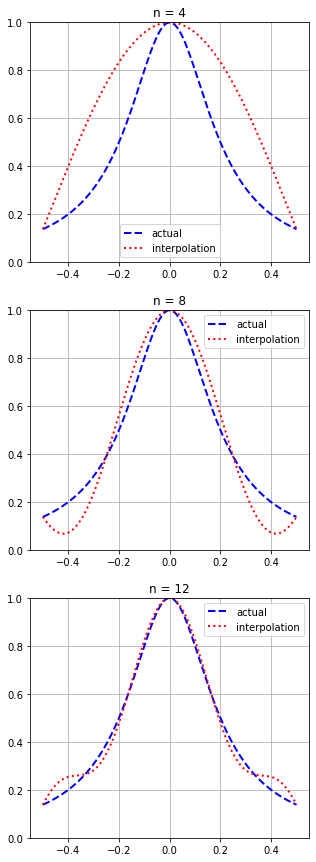

In [28]:
fig = plt.figure(figsize=(5,15))

ne=1000
k = np.arange(ne) 
i=0

for n in [4,8,12]:
    i+=1
    j = np.arange(n+1)
    xj = -1+j*(2/n)
    yj = 1/(1+25*(xj**2))
    xk = np.linspace(-0.5,0.5,ne) 
    yk = 1/(1+25*(xk**2))
    yb = barycentric_interp(xj, yj, xk)
    ax = fig.add_subplot(3,1,i)
    xk = np.linspace(-0.5,0.5,ne)
    ax.plot(xk,yk, 'b--',linewidth=2, label="actual") 
    ax.plot(xk,yb, 'r:',linewidth=2, label="interpolation") 
    ax.grid()
    ax.set_title("n = " + str(n))
    ax.set_ylim([0,1])
    ax.legend()

the Chebyshev nodes $x_j = \text{cos}(\frac{j\pi}{n})$, $j = 0,\ldots, n$ for $n = 4, 8, 12, $ and $ 100$.

For equidistributed nodes one can use the barycentric weights as

$$ \lambda_j = (-1)^j \begin{pmatrix} n \\ j \end{pmatrix} \qquad (4)$$

and for the Chebyshev nodes we can use

\begin{equation}
\lambda_j =
    \begin{cases}
        \frac{1}{2}(-1)^j & \text{for } j =0 \text{ or } j = n\\
        (-1)^j & j = 1, \ldots, n-1 
    \end{cases} \qquad (5)
\end{equation}  

Make sure to employ (4) and (5) in your Barycentric Formula code for this problem. To plot the corresponding $p_n$ evaluate this at suffciently large number of points $n_e$ as in Prob. 2. Note that your Barycentric Formula cannot be used to evaluate $p_n$ when $x$ coincides with an interpolating node! Plot also $f$ for comparison.

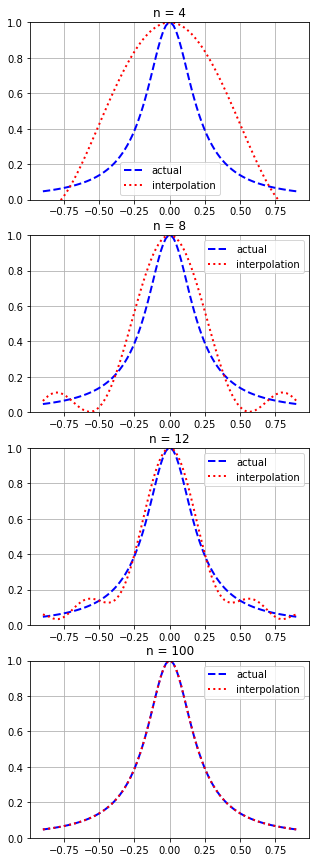

In [31]:
fig = plt.figure(figsize=(5,15))

ne=100
k = np.arange(ne)
i=0

for n in [4,8,12,100]:
    i+=1
    j = np.arange(n+1)
    xj = np.cos((j*np.pi)/n)
    yj = 1/(1+25*(xj**2))
    xk = np.linspace(-0.9,0.9,ne) 
    yk = 1/(1+25*(xk**2))
    yb = barycentric_interp(xj, yj, xk)
    ax = fig.add_subplot(4,1,i)
    xk = np.linspace(-0.9,0.9,ne)
    ax.plot(xk,yk, 'b--',linewidth=2, label="actual") 
    ax.plot(xk,yb, 'r:',linewidth=2, label="interpolation") 
    ax.grid()
    ax.set_title("n = " + str(n))
    ax.set_ylim([0,1])
    ax.legend()